In [1]:
# Getting all the desired Libraries for the project

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel("/Users/eshanakshata/Desktop/marketing_campaign (1).xlsx")

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
# As we could see there is a presence of non numerical columns which we think we should drop it

numeric_df = df.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer'])


numeric_df.fillna(0, inplace=True)


X = numeric_df.drop(columns=['Response'])
y = numeric_df['Response']


clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)


feature_importances = clf.feature_importances_

In [5]:
# Lets Select features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Setting a threshold for feature selection
threshold = 0.05


selected_features = X.columns[sorted_indices[feature_importances[sorted_indices] > threshold]]


print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Recency
MntMeatProducts
MntWines
Income
MntGoldProds
Year_Birth
MntSweetProducts
MntFishProducts
MntFruits
NumWebVisitsMonth


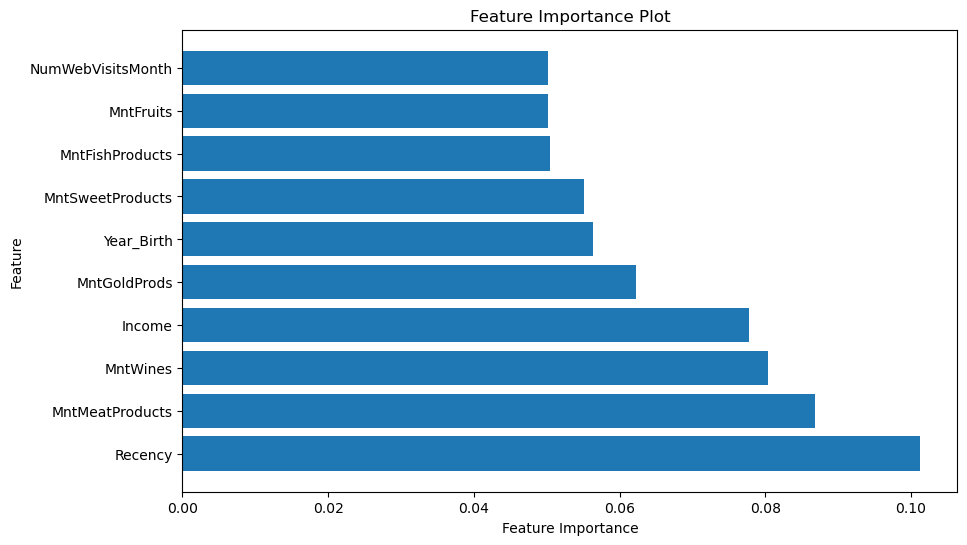

In [6]:
# Visualizing feature
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), feature_importances[sorted_indices][feature_importances[sorted_indices] > threshold], align='center')
plt.yticks(range(len(selected_features)), X.columns[sorted_indices][feature_importances[sorted_indices] > threshold])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [7]:
print("The plot suggests that features like 'Income', 'MntWines', 'MntFruits', etc., are highly important for predicting customer response.")
print("This indicates that customers with higher income and spending on certain product categories are more likely to respond positively to marketing campaigns.")
print("It also implies that factors like 'Recency', 'NumDealsPurchases', and 'NumWebPurchases' play a significant role in customer behavior and response to marketing efforts.")



The plot suggests that features like 'Income', 'MntWines', 'MntFruits', etc., are highly important for predicting customer response.
This indicates that customers with higher income and spending on certain product categories are more likely to respond positively to marketing campaigns.
It also implies that factors like 'Recency', 'NumDealsPurchases', and 'NumWebPurchases' play a significant role in customer behavior and response to marketing efforts.


In [8]:
# lets check the columns name and their types and shape

# Checking the columns name and their types
print(df.info())

# Checking the shape of the dataframe
print("\nShape of the dataframe:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

##Feature Engineering

In [10]:
#First Calculating Total Amount Spent

df["total_amount_spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


In [11]:
#Calculating Total Number of Children .ie It creates another new column, Children, which sums up the number of children living in the household

df["Children"]=df["Kidhome"]+df["Teenhome"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  total_amount_spent  Children  
0              3         11         1                1617         0  
1              3         11         0                  27         2  
2              3         11         0                 776         0  
3              3         11         0                  53         1  
4              3         11         0                 422         1

In [12]:
#lets check the columns names

print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'total_amount_spent', 'Children'],
      dtype='object')


#Performing EDA

In [14]:
#Irrelevance to Analysis: Columns like Dt_Customer (date of customer acquisition) and ID (a unique identifier) might not be useful for modeling because they do not provide meaningful information about the target variable or may not be relevant for the current analysis.

#Redundancy: Columns such as Z_CostContact and Z_Revenue is redundant because their information is already captured in other features and they don't contribute additional value to the analysis.

#High Cardinality or Unnecessary Detail: Year_Birth is dropped because it's less relevant compared to more direct features like age, or if you have other features that already capture the information in a more useful form.

#Aggregated Information: The columns related to spending (MntWines, MntFruits, etc.) should be dropped as we have already created an aggregated feature (total_amount_spent) that combines this information, making individual columns redundant.

In [15]:
to_drop = [ "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID" ,'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

df=df.drop(to_drop,axis=1)

df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0  Graduation         Single  58138.0        0         0       58   
1  Graduation         Single  46344.0        1         1       38   
2  Graduation       Together  71613.0        0         0       26   
3  Graduation       Together  26646.0        1         0       26   
4         PhD        Married  58293.0        1         0       94   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
0             0         0         1                1617         0  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1

In [16]:
df.shape

(2240, 20)

In [17]:
# Create a copy of df named df1 to avoid altering the original data.

df1=df.copy()
le = LabelEncoder()
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = le.fit_transform(df[i])

df1.head(10)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          2               4  58138.0        0         0       58   
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   
6          2               2  55635.0        0         1       34   
7          4               3  33454.0        1         0       32   
8          4               5  30351.0        1         0       19   
9          4               5   5648.0        1         1       68   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   
6                  4                7                    3                  7   
7                  2                4                    0                  4   
8                  1                3                    0                  2   
9                  1                1                    0                  0   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   
6                  6             0             0             0             0   
7                  8             0             0             0             0   
8                  9             0             0             0             0   
9                 20             1             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
0             0         0         1                1617         0  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1  
5             0         0         0                 716         1  
6             0         0         0                 590         1  
7             0         0         0                 169         1  
8             0         0         1                  46         1  
9             0         0         0                  49         2

In [18]:
# checking datatype and null values
print(df1.info())
print(df1.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   NumDealsPurchases    2240 non-null   int64  
 7   NumWebPurchases      2240 non-null   int64  
 8   NumCatalogPurchases  2240 non-null   int64  
 9   NumStorePurchases    2240 non-null   int64  
 10  NumWebVisitsMonth    2240 non-null   int64  
 11  AcceptedCmp3         2240 non-null   int64  
 12  AcceptedCmp4         2240 non-null   int64  
 13  AcceptedCmp5         2240 non-null   int64  
 14  AcceptedCmp1         2240 non-null   int64  
 15  AcceptedCmp2         2240 non-null   i

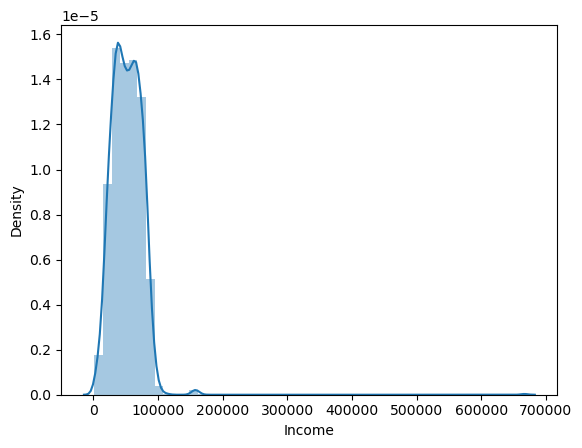

In [19]:
# Visualizing the Income column
sns.distplot(df1['Income'])
plt.show()

In [20]:
# dropping null values
df1.dropna(inplace=True)
df1.shape

(2216, 20)

In [21]:
# checking whether their is are any duplicates present
df1.duplicated().any()
df1[df1.duplicated()]

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
83            3               5  38620.0        0         0       56   
179           0               3  78497.0        0         0       44   
281           2               5  51369.0        0         1       84   
282           2               5  37760.0        0         0       20   
363           4               3  37717.0        1         0       31   
...         ...             ...      ...      ...       ...      ...   
2218          2               5  22775.0        1         0       40   
2221          3               4  75777.0        0         0       12   
2225          2               5  58554.0        1         1       55   
2234          2               3  34421.0        1         0       81   
2236          4               5  64014.0        2         1       56   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
83                    1                2                    5   
179                   1                5                    7   
281                   2                8                    2   
282                   2                4                    1   
363                   1                1                    0   
...                 ...              ...                  ...   
2218                  1                1                    0   
2221                  1                3                    6   
2225                  6                8                    2   
2234                  1                1                    0   
2236                  7                8                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
83                    3                  3             0             0   
179                  12                  2             0             0   
281                   4                  8             0             0   
282                   6                  7             0             0   
363                   2                  9             0             0   
...                 ...                ...           ...           ...   
2218                  2                  8             0             0   
2221                 11                  1             0             1   
2225                  6                  7             0             0   
2234                  2                  7             0             0   
2236                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
83               0             0             0         0         0   
179              0             1             0         0         0   
281              0             0             0         0         0   
282              0             0             0         0         0   
363              0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2218             0             0             0         0         0   
2221             1             0             0         0         1   
2225             0             0             0         0         0   
2234             0             0             0         0         0   
2236             0             1             0         0         0   

      total_amount_spent  Children  
83                   318         0  
179                  978         0  
281                  576         1  
282                  317         0  
363                   25         1  
...                  ...       ...  
2218                  15         1  
2221                1438         0  
2225                 586         2  
2234                  30         1  
2236                 444         3  

[182 rows x 20 columns]

In [22]:
# dropping duplicate values
df1=df1.drop_duplicates().reset_index(drop=True)
df1[df1.duplicated()]
df1.shape

(2034, 20)

In [23]:


print(df1.dtypes)
print(df1.head())


Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
total_amount_spent       int64
Children                 int64
dtype: object
   Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          2               4  58138.0        0         0       58   
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4         

Income


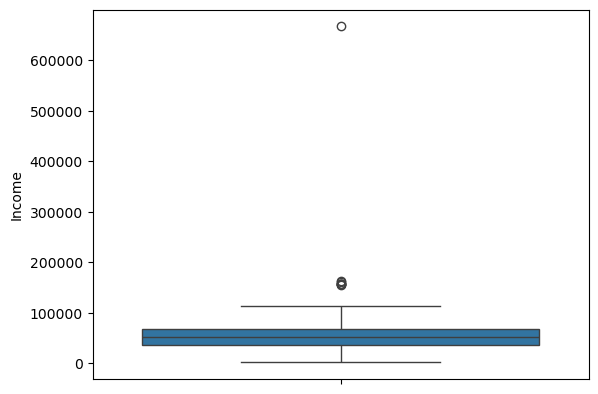

Kidhome


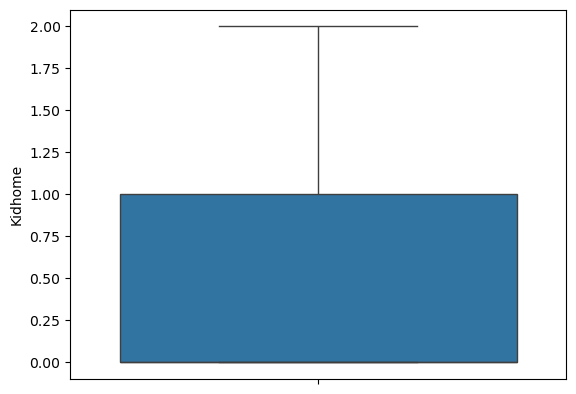

Teenhome


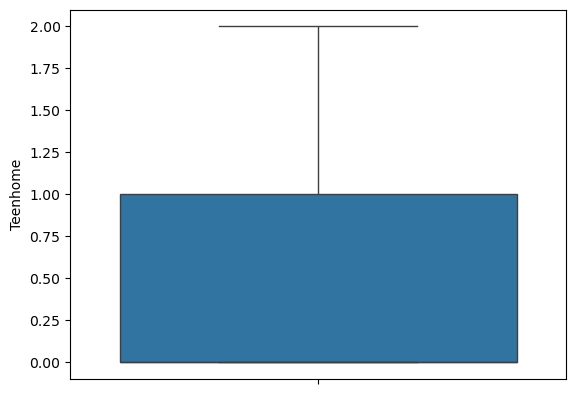

Recency


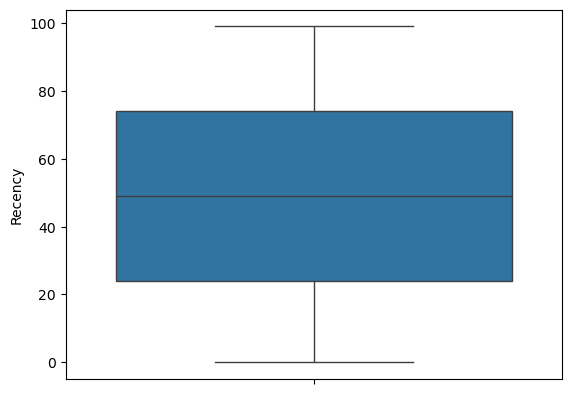

NumDealsPurchases


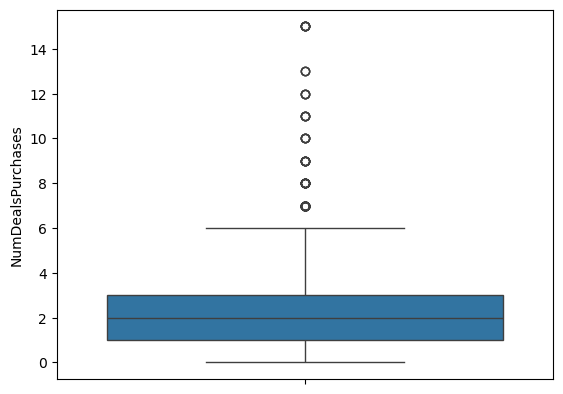

NumWebPurchases


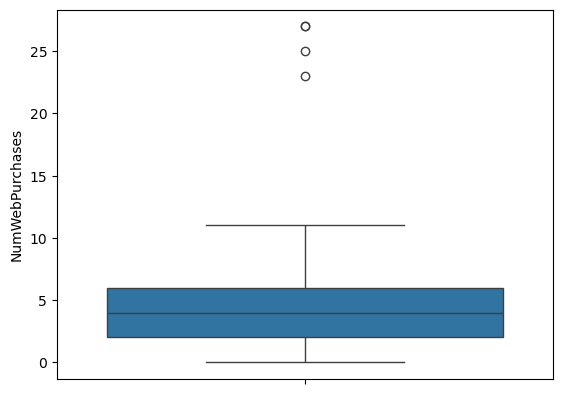

NumCatalogPurchases


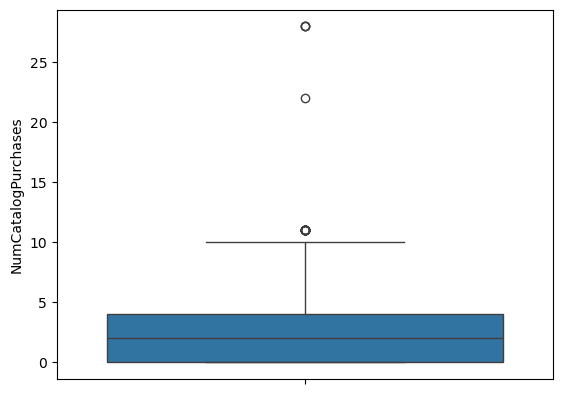

NumStorePurchases


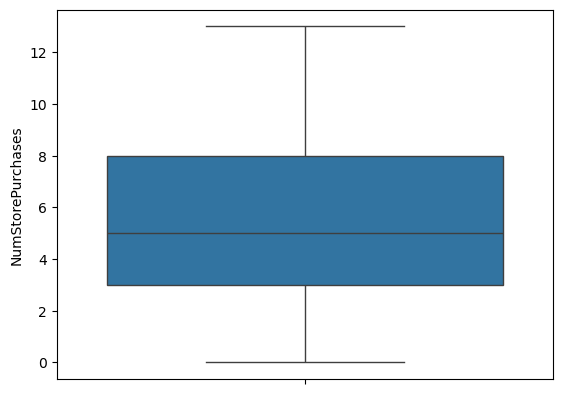

NumWebVisitsMonth


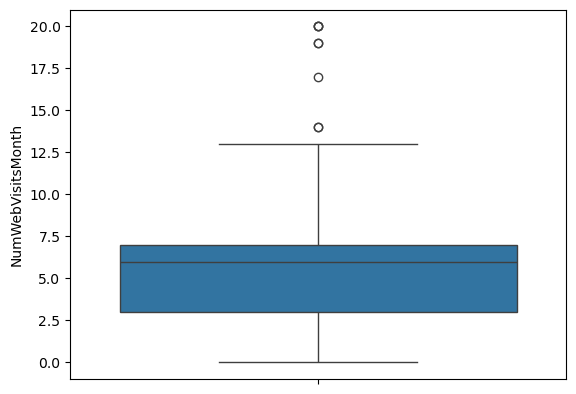

AcceptedCmp3


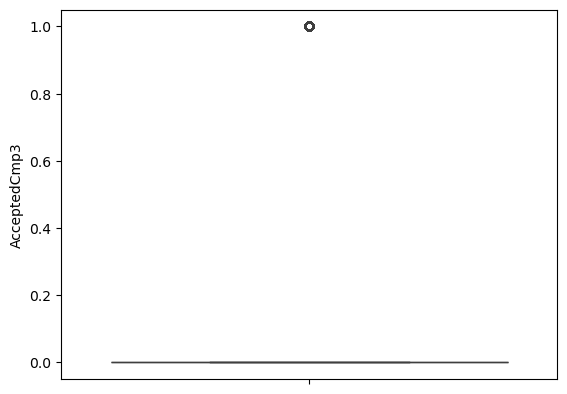

AcceptedCmp4


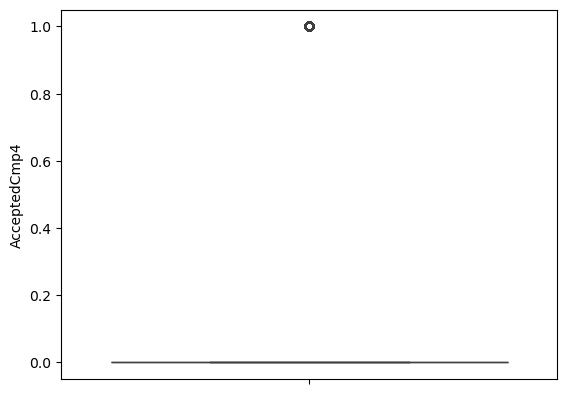

AcceptedCmp5


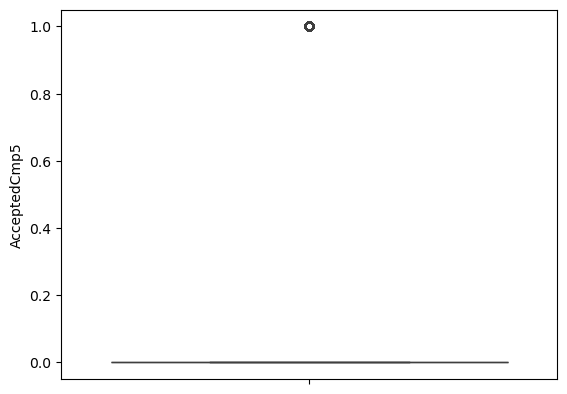

AcceptedCmp1


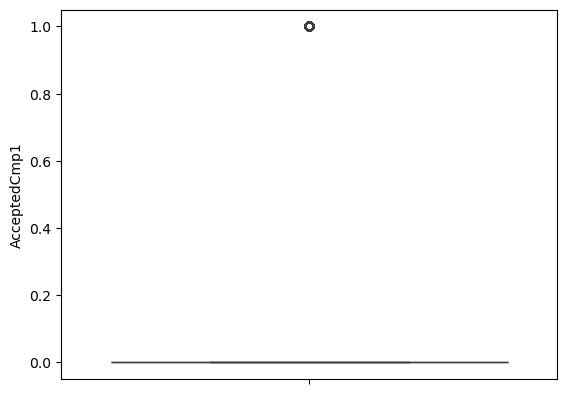

AcceptedCmp2


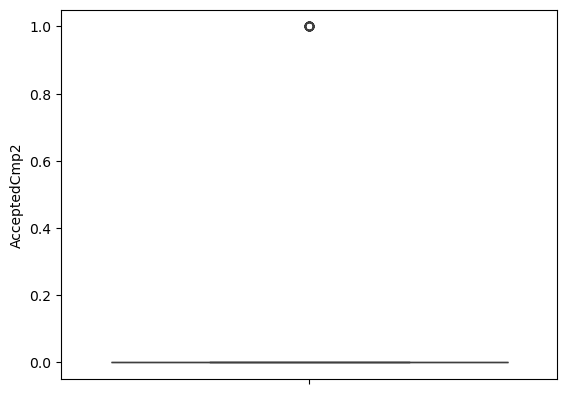

Complain


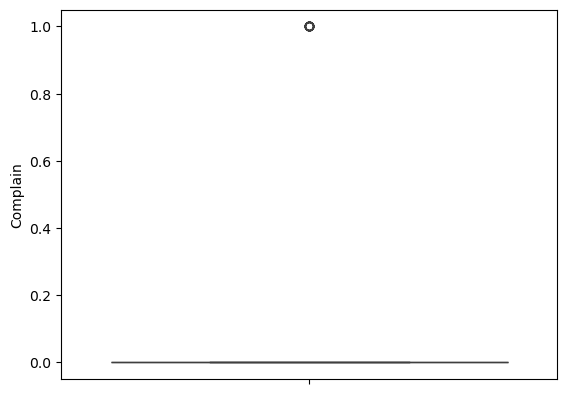

Response


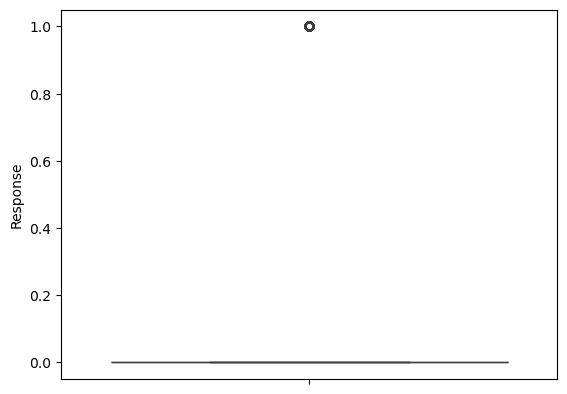

total_amount_spent


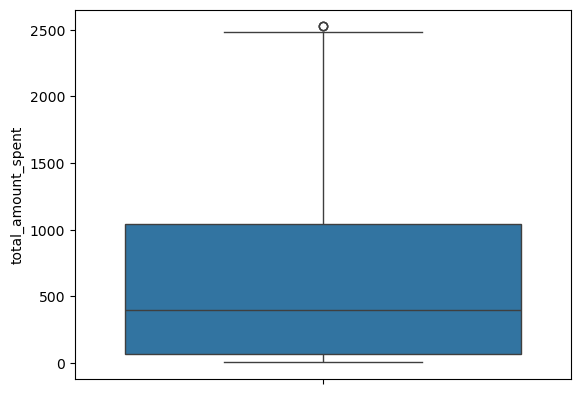

Children


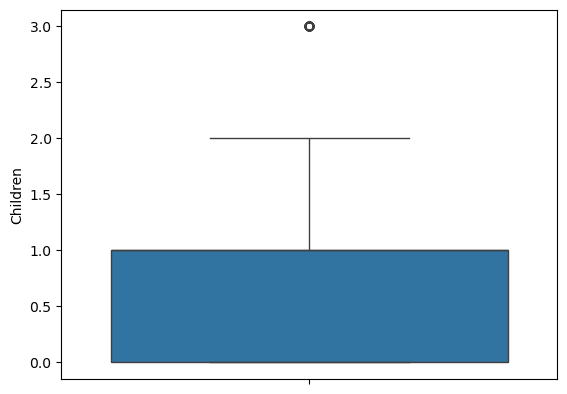

In [24]:
# Boxplot to visualize outliers

for i in df.columns:
    if(df[i].dtype!='object'):
        print(i)
        sns.boxplot(df[i])
        plt.show()

In [25]:
# Lets see all the outliers
out=[]
def Zscore_outlier(df1):
    m = np.mean(df1)
    sd = np.std(df1)
    for i in df1:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)

for i in df1.columns:
    print(i)
    Zscore_outlier(df1[i])
    print('\n')

Education
Outliers: []


Marital_Status
Outliers: [0, 0, 7, 7]


Income
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Kidhome
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Teenhome
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Recency
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


NumDealsPurchases
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0, 15, 9, 15, 10, 9, 13, 9, 9, 15, 15, 15, 11, 12, 10, 15, 10, 11, 10, 13, 9, 12, 11, 9, 9, 13, 11, 15, 11, 10]


NumWebPurchases
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0, 15, 9, 15, 10, 9, 13, 9, 9, 15, 15, 15, 11, 12, 10, 15, 10, 11, 10, 13, 9, 12, 11, 9, 9, 13, 11, 15, 11, 10, 23, 27, 25]


NumCatalo

In [26]:
#Statistical view of our DataFrame df1
df1.describe().T

count          mean           std     min       25%  \
Education            2034.0      2.396755      1.127577     0.0      2.00   
Marital_Status       2034.0      3.716323      1.077270     0.0      3.00   
Income               2034.0  52357.791544  25526.956988  1730.0  35528.25   
Kidhome              2034.0      0.442970      0.535914     0.0      0.00   
Teenhome             2034.0      0.508358      0.546130     0.0      0.00   
Recency              2034.0     48.844641     28.983678     0.0     24.00   
NumDealsPurchases    2034.0      2.337758      1.933849     0.0      1.00   
NumWebPurchases      2034.0      4.099312      2.756911     0.0      2.00   
NumCatalogPurchases  2034.0      2.670600      2.937896     0.0      0.00   
NumStorePurchases    2034.0      5.782203      3.238853     0.0      3.00   
NumWebVisitsMonth    2034.0      5.322517      2.438665     0.0      3.00   
AcceptedCmp3         2034.0      0.074238      0.262222     0.0      0.00   
AcceptedCmp4         2034.0      0.076205      0.265390     0.0      0.00   
AcceptedCmp5         2034.0      0.072271      0.259000     0.0      0.00   
AcceptedCmp1         2034.0      0.065388      0.247271     0.0      0.00   
AcceptedCmp2         2034.0      0.012783      0.112363     0.0      0.00   
Complain             2034.0      0.009833      0.098696     0.0      0.00   
Response             2034.0      0.153392      0.360454     0.0      0.00   
total_amount_spent   2034.0    607.637168    603.552763     5.0     69.00   
Children             2034.0      0.951327      0.745599     0.0      0.00   

                         50%       75%       max  
Education                2.0      3.00       4.0  
Marital_Status           4.0      5.00       7.0  
Income               51533.0  68480.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
total_amount_spent     397.0   1048.00    2525.0  
Children                 1.0      1.00       3.0

In [27]:
# Lets measure the spread of the middle 50% of a dataset.
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Education                  1.0
Marital_Status             2.0
Income                 32952.5
Kidhome                    1.0
Teenhome                   1.0
Recency                   50.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        4.0
NumStorePurchases          5.0
NumWebVisitsMonth          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Response                   0.0
total_amount_spent       979.0
Children                   1.0
dtype: float64


In [28]:
df1.shape

(2034, 20)

In [29]:
# filtering i.e removing any outlier present
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(1212, 20)

In [30]:
# This shows before and after the outliers were removed

In [31]:
df2.head()




Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1  
5             0         0         0                 716         1

In [32]:
df2.describe().T

count          mean           std     min       25%  \
Education            1212.0      2.596535      0.873363     1.0      2.00   
Marital_Status       1212.0      3.701320      1.074391     0.0      3.00   
Income               1212.0  48387.150990  18842.366083  5305.0  33433.25   
Kidhome              1212.0      0.460396      0.522886     0.0      0.00   
Teenhome             1212.0      0.528878      0.528299     0.0      0.00   
Recency              1212.0     50.523927     28.497531     0.0     26.00   
NumDealsPurchases    1212.0      2.148515      1.335307     0.0      1.00   
NumWebPurchases      1212.0      3.712046      2.487376     0.0      2.00   
NumCatalogPurchases  1212.0      2.092409      2.410007     0.0      0.00   
NumStorePurchases    1212.0      5.586634      3.184902     0.0      3.00   
NumWebVisitsMonth    1212.0      5.322607      2.199553     0.0      4.00   
AcceptedCmp3         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp4         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp5         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp1         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp2         1212.0      0.000000      0.000000     0.0      0.00   
Complain             1212.0      0.000000      0.000000     0.0      0.00   
Response             1212.0      0.000000      0.000000     0.0      0.00   
total_amount_spent   1212.0    468.867162    502.050364     9.0     57.00   
Children             1212.0      0.989274      0.649500     0.0      1.00   

                         50%      75%      max  
Education                2.0      3.0      4.0  
Marital_Status           3.0      5.0      7.0  
Income               47581.5  64332.5  92859.0  
Kidhome                  0.0      1.0      2.0  
Teenhome                 1.0      1.0      2.0  
Recency                 51.0     75.0     99.0  
NumDealsPurchases        2.0      3.0      6.0  
NumWebPurchases          3.0      5.0     11.0  
NumCatalogPurchases      1.0      3.0     10.0  
NumStorePurchases        4.0      8.0     13.0  
NumWebVisitsMonth        6.0      7.0     13.0  
AcceptedCmp3             0.0      0.0      0.0  
AcceptedCmp4             0.0      0.0      0.0  
AcceptedCmp5             0.0      0.0      0.0  
AcceptedCmp1             0.0      0.0      0.0  
AcceptedCmp2             0.0      0.0      0.0  
Complain                 0.0      0.0      0.0  
Response                 0.0      0.0      0.0  
total_amount_spent     244.0    832.5   2440.0  
Children                 1.0      1.0      2.0

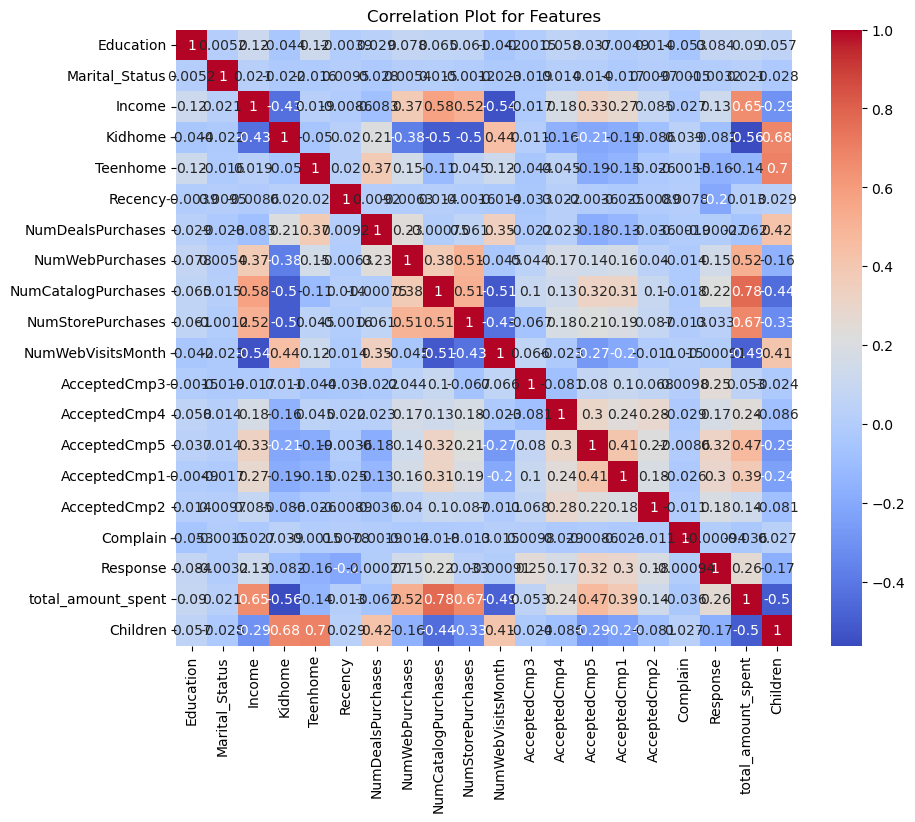

In [33]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Plot for Features')
plt.show()

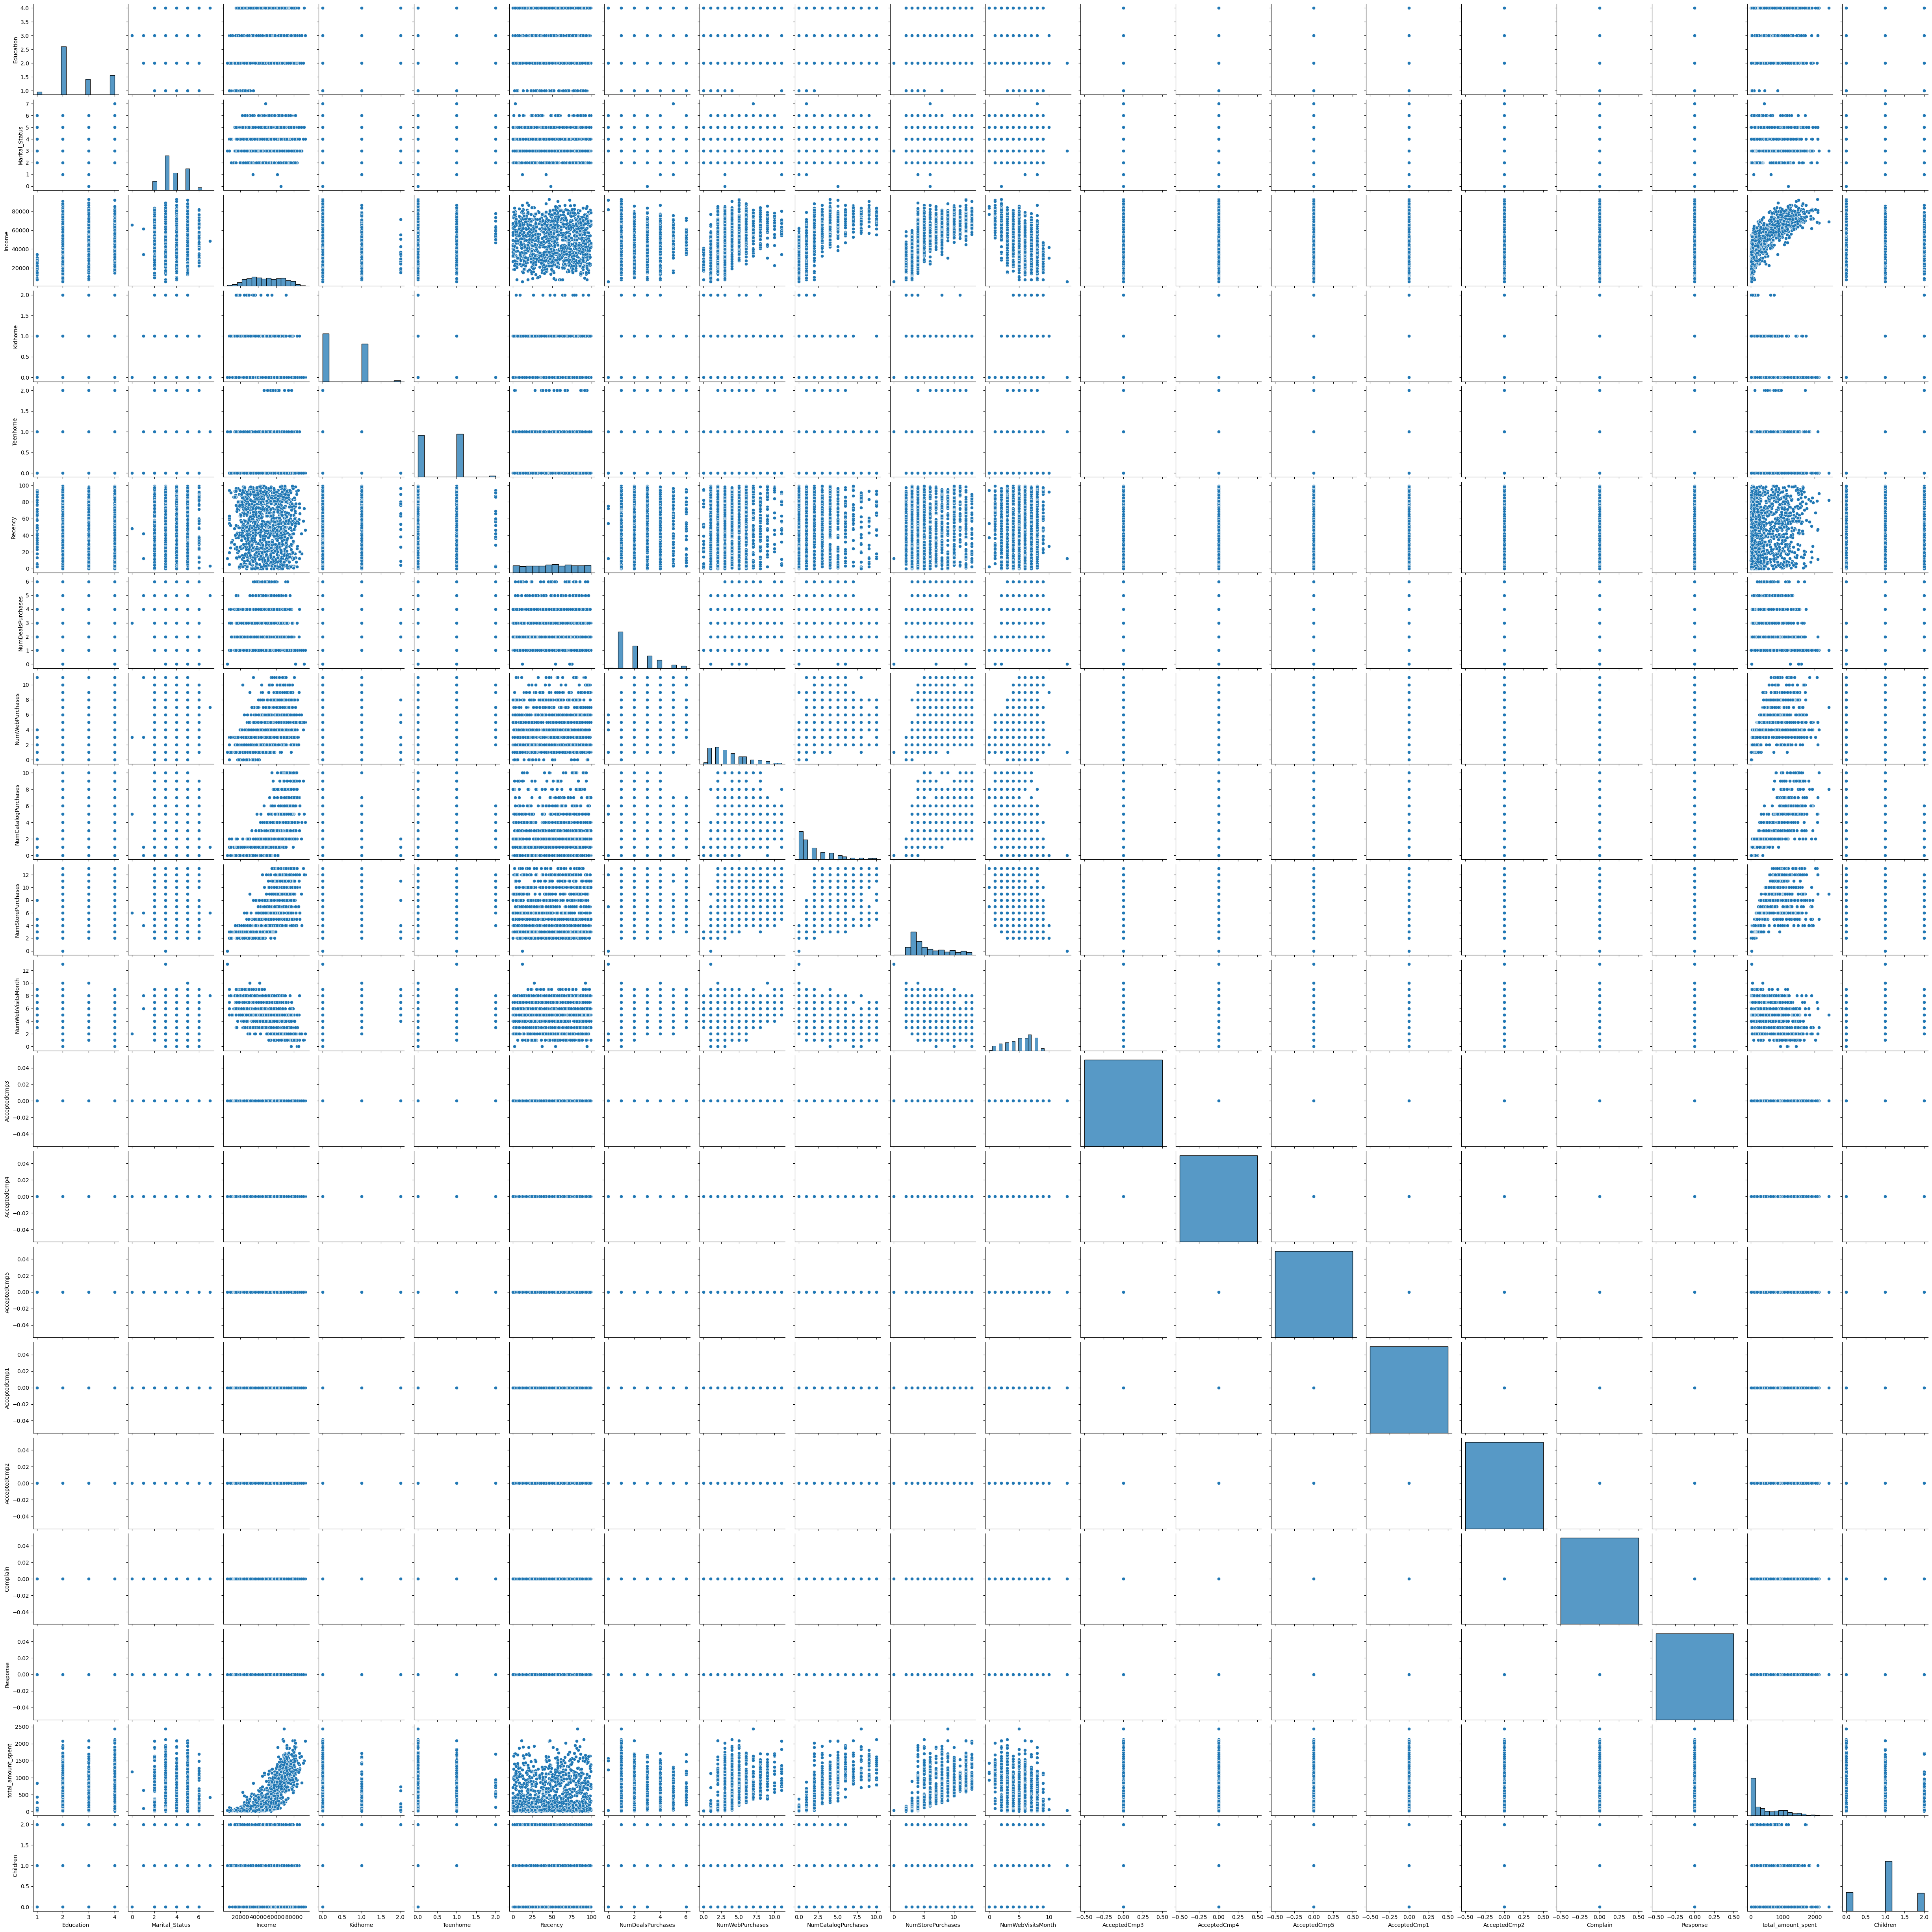

In [34]:
sns.pairplot(df2)
plt.show()

In [35]:
df2.shape

(1212, 20)

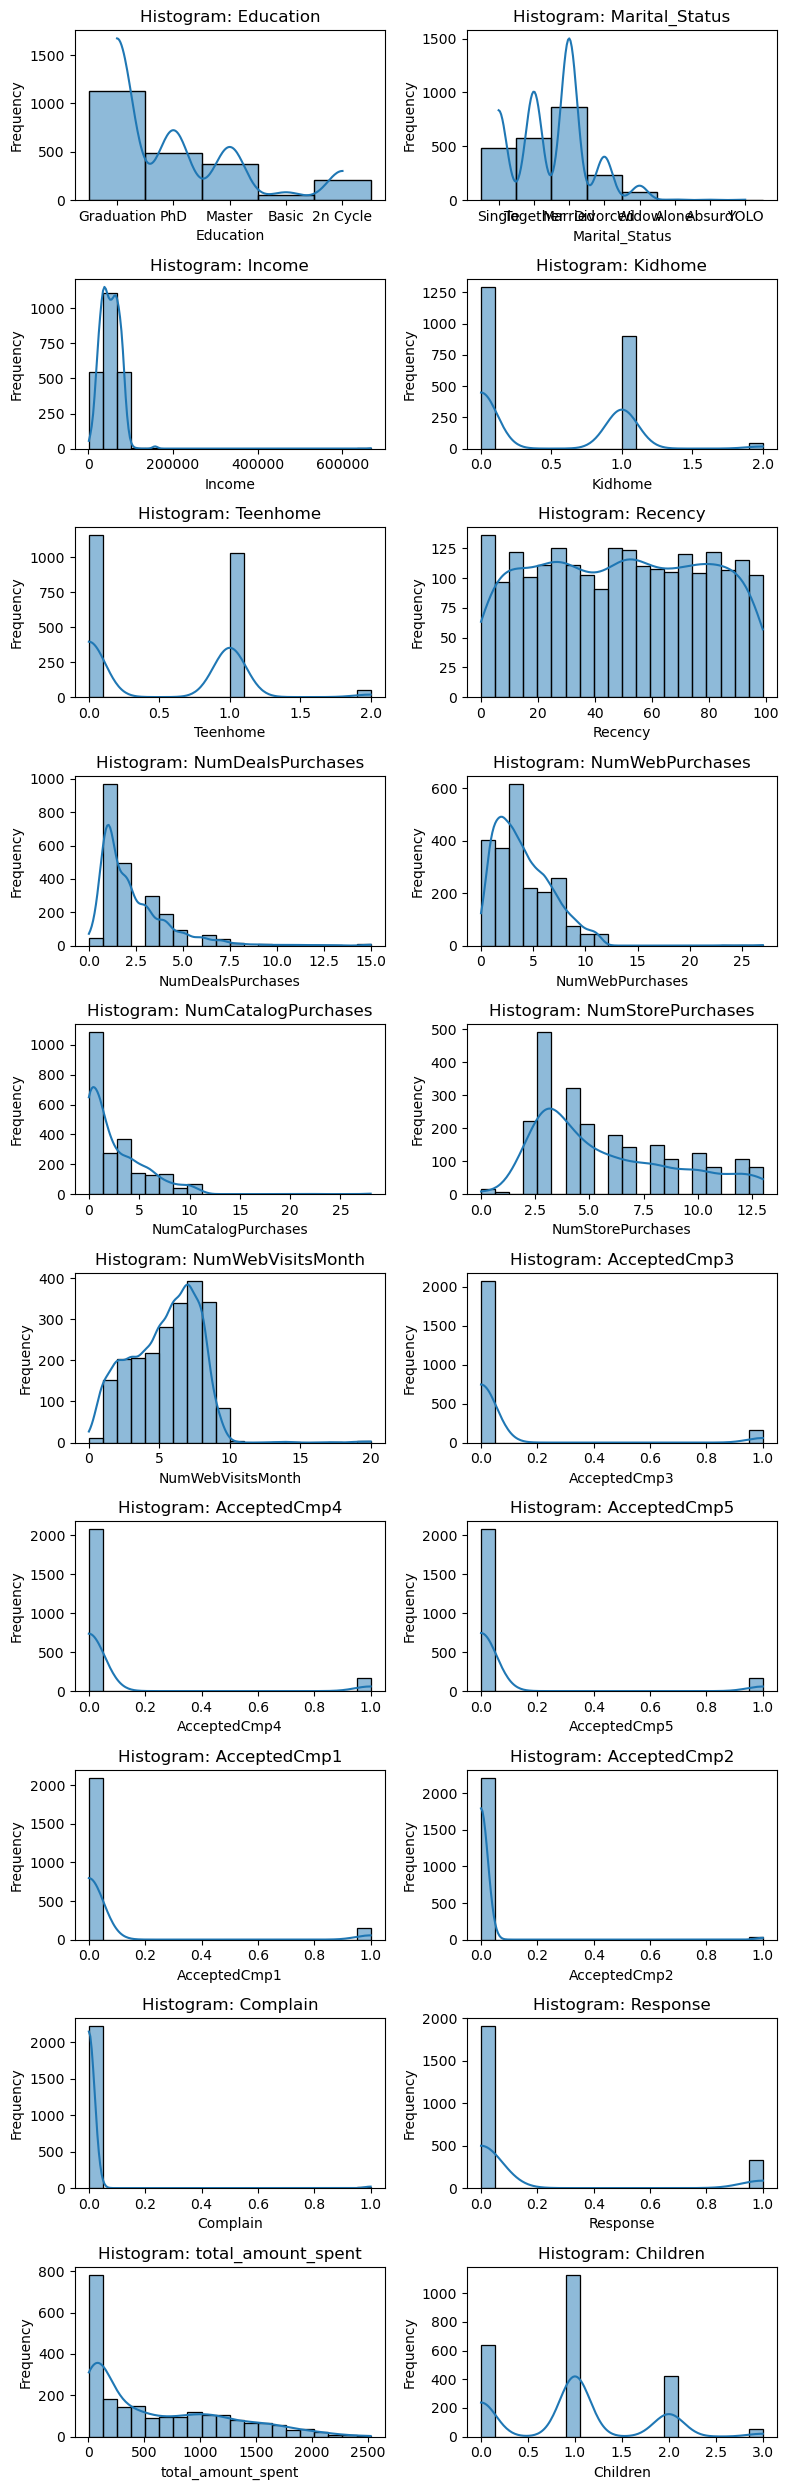

In [36]:
# Generate a grid of 10 rows and 2 columns for subplots
fig, axes = plt.subplots(10, 2, figsize=(8, 25))

# Loop through each feature to create histograms
for i, feature in enumerate(df2.columns):
    row, col = divmod(i, 2)  # Determine the subplot's row and column
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram: {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust subplot layout and display the plot
plt.tight_layout()
plt.show()


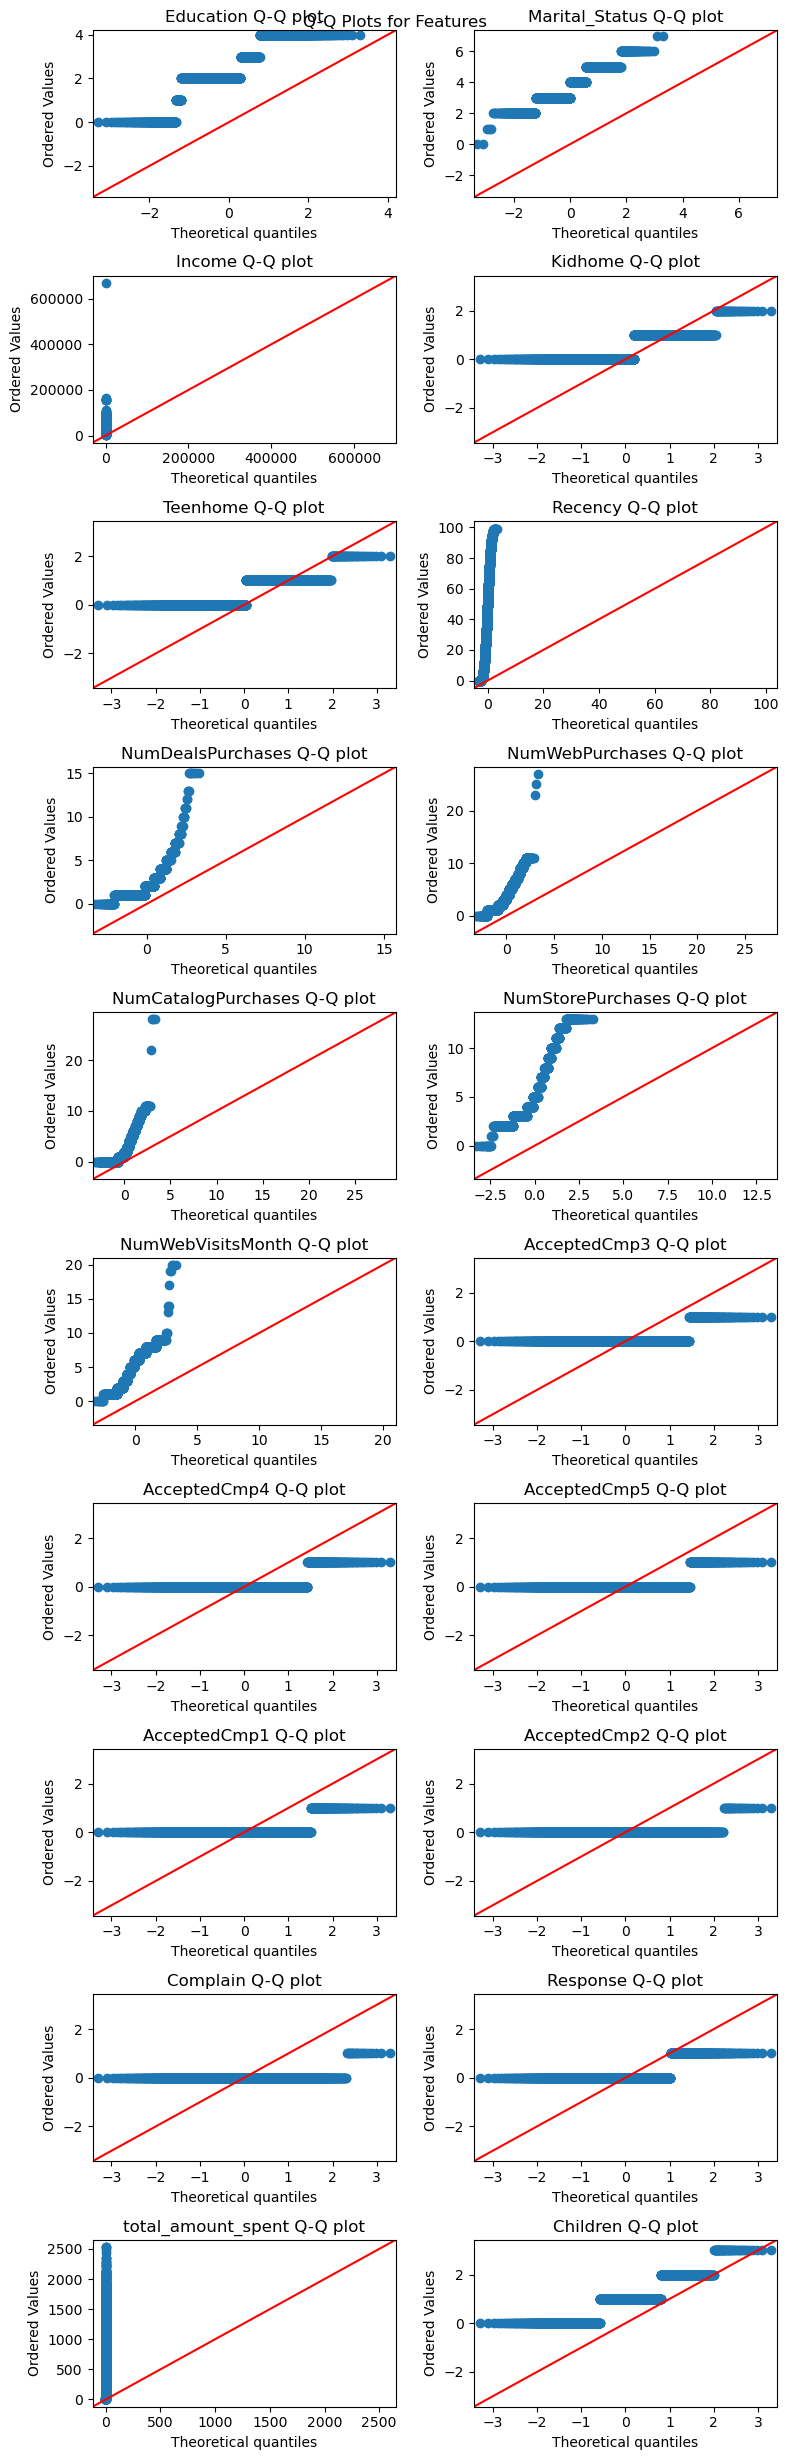

In [37]:
# Assessing Normality, Evaluating Distribution Fit and Identifying Deviations

# for this we are going to use Q-Q plots as
#Q-Q plots are commonly used to check if a dataset follows a normal distribution
#They can also be used to compare the data distribution to other theoretical distributions, not just normal
#Q-Q plots help identify deviations from the theoretical distribution.


# Create subplots
fig, axes = plt.subplots(10, 2, figsize=(8, 25))
fig.suptitle('Q-Q Plots for Features')

# Generate Q-Q plots for each feature
for i, feature in enumerate(df2.columns):
    row, col = divmod(i, 2)
    sm.qqplot(df1[feature], line='45', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Q-Q plot')
    axes[row, col].set_xlabel('Theoretical quantiles')
    axes[row, col].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()

In [38]:
# we can identify features that appear to be normally distributed and those that deviate from normality.

# For example, if we observe that the Q-Q plot for 'Income' shows a significant deviation from the diagonal line, it suggests that the 'Income' variable may not follow a normal distribution.

# we can use this information to make informed decisions about data transformations or modeling techniques.

# To get a more precise analysis, you could consider statistical tests for normality, such as the Shapiro-Wilk test.


In [39]:
df2.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_amount_spent',
       'Children'],
      dtype='object')

In [40]:
df3=df2.copy()
df3.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)
df3.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   

   NumWebVisitsMonth  total_amount_spent  Children  
1                  5                  27         2  
2                  4                 776         0  
3                  6                  53         1  
4                  5                 422         1  
5                  6                 716         1

In [41]:
# These columns are dropped because they are related to past campaign responses and are not relevant for predicting future responses.
# The goal is to build a model that predicts a customer's likelihood of responding to a new campaign, and including past campaign responses would introduce bias and overfitting.
# By removing these columns, we focus on the customer's general characteristics and spending habits, which are more likely to be predictive of their future behavior.


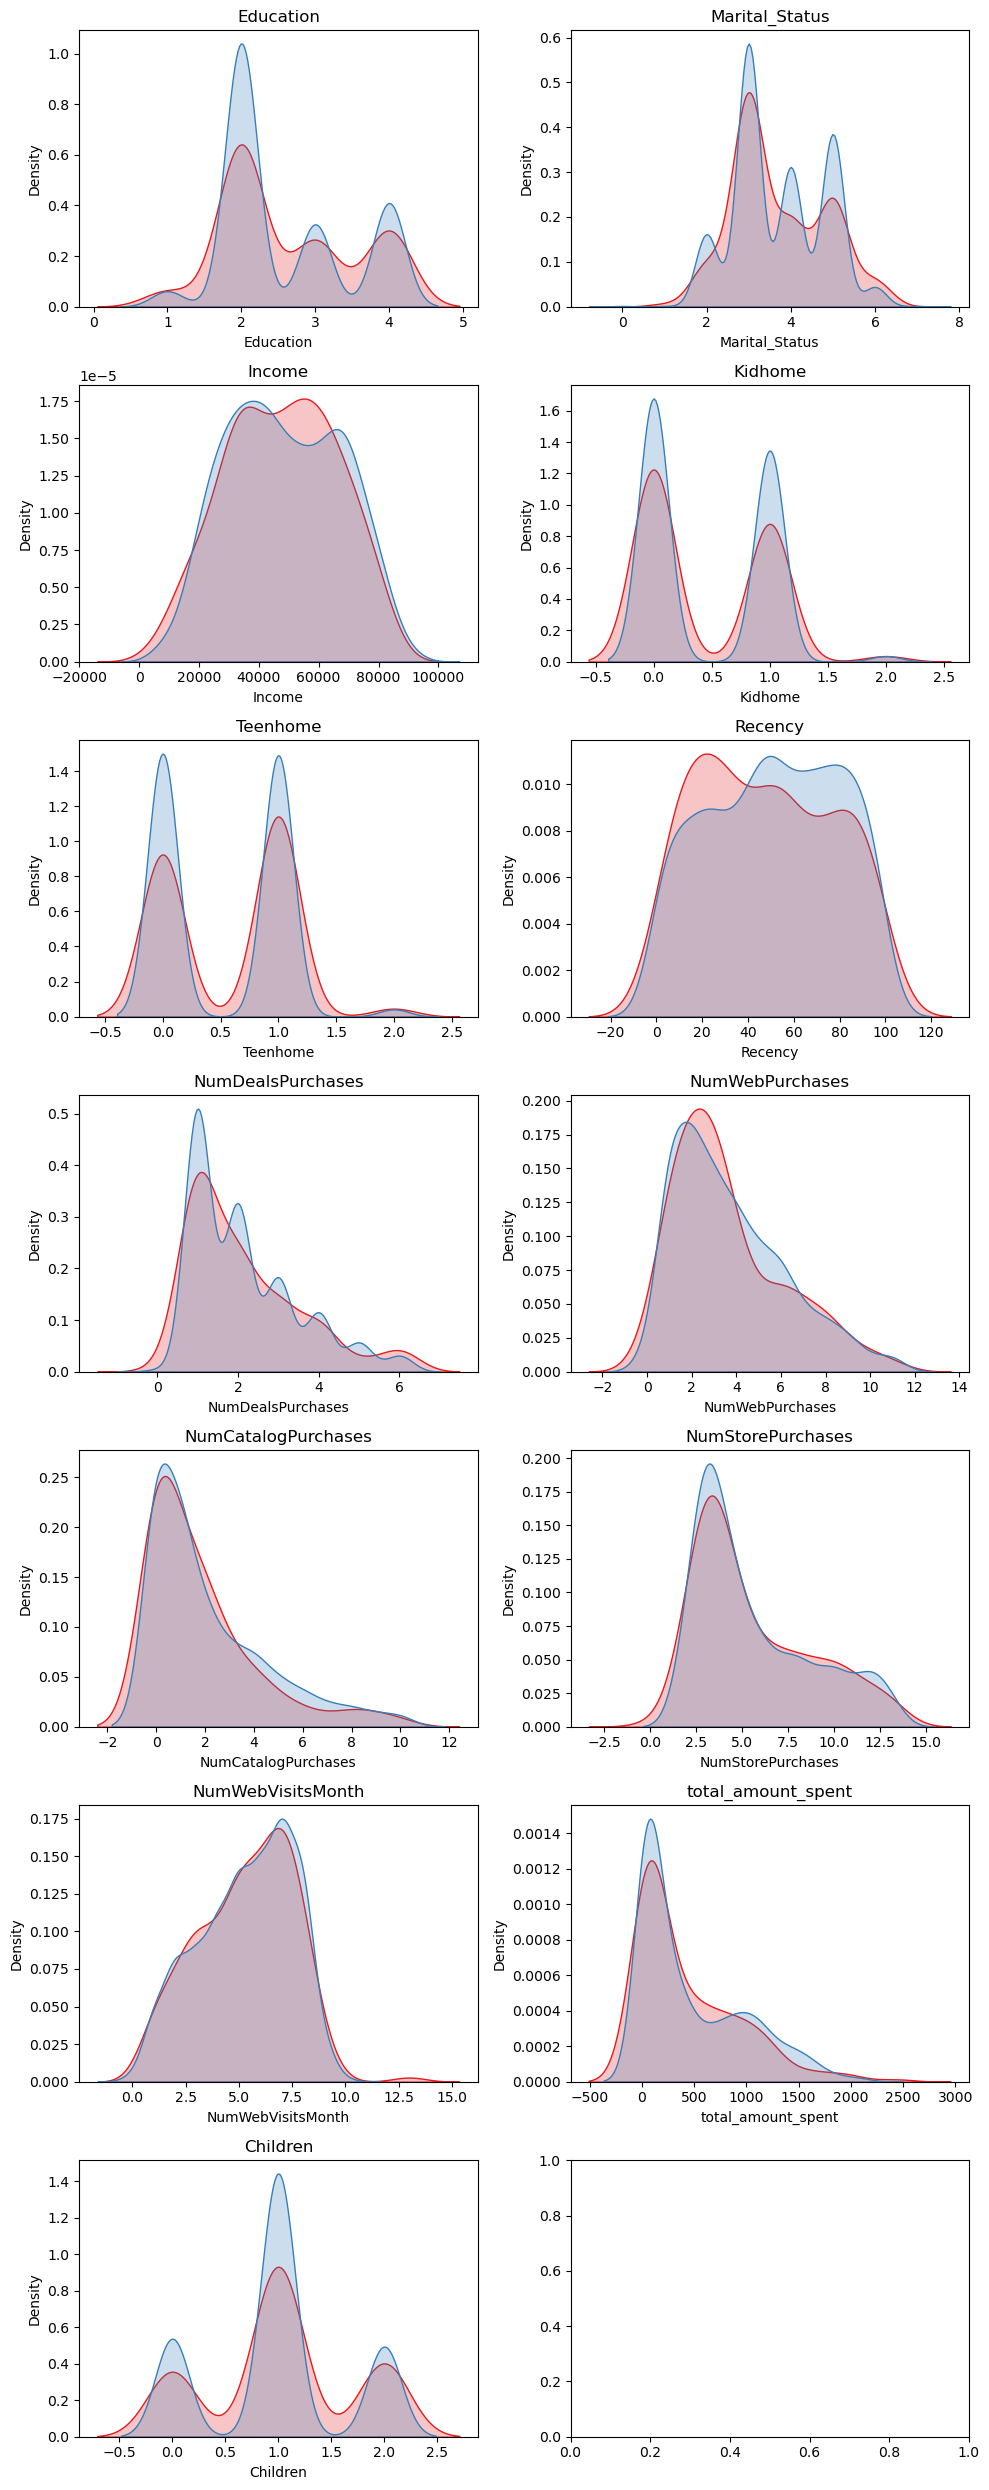

In [42]:
# Lets estimate the probability density function of a continuous random variable with kde plot

response_palette = sns.color_palette("Set1", n_colors=len(df['Response'].unique()))

num_features = len(df3.columns)
rows, cols = 7, 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 25))

for i, feature in enumerate(df3.columns):
    row, col = divmod(i, cols)
    for idx, response_value in enumerate(df['Response'].unique()):
        sns.kdeplot(data=df3[df['Response'] == response_value], x=feature, fill=True, color=response_palette[idx], ax=axes[row, col], label=f'Response {response_value}')
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [43]:
#We observe that the KDE plot for 'Income' shows a higher density of customers with a positive response (Response = 1) at higher income levels, it suggests that higher income might be a strong predictor of a positive response.

# Similarly, if the KDE plot for 'Recency' shows a higher density of customers with a positive response at lower recency values (meaning they made a purchase recently), it suggests that recent purchases might be correlated with a higher likelihood of responding positively to a marketing campaign.

# Analyzing these KDE plots can provide valuable insights into the relationships between features and the target variable, helping us understand which features are most important for predicting customer response.


In [44]:
# lets calculate the mean and standard deviation of each column in df2


mean = np.mean(df2,axis=0)
std_dev = np.std(df2,axis=0)

In [45]:
standardized = np.allclose(mean,0)and np.allclose(std_dev,0)
if standardized:
    print("The data is standardized.")
else:
    print("The data is not standardized.")

The data is not standardized.


In [46]:
# The data isn't standardized yet; we need to normalize it to achieve a normal distribution before applying PCA.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)
# Transformed data
X_scaled

array([[-0.68331387,  0.27811387, -0.10847865, ...,  0.        ,
        -0.88048848,  1.55680275],
       [-0.68331387,  1.20925753,  1.23314856, ...,  0.        ,
         0.61200956, -1.52376041],
       [-0.68331387,  1.20925753, -1.1543203 , ...,  0.        ,
        -0.82867947,  0.01652117],
       ...,
       [-0.68331387,  0.27811387, -1.14529435, ...,  0.        ,
        -0.89045175, -1.52376041],
       [-0.68331387, -0.6530298 ,  0.68150399, ...,  0.        ,
         1.73785922,  0.01652117],
       [ 0.46215834,  1.20925753,  1.10742244, ...,  0.        ,
         0.74551739,  0.01652117]])

Education  Marital_Status        Income      Kidhome     Teenhome  \
count  1212.000000     1212.000000   1212.000000  1212.000000  1212.000000   
mean      2.596535        3.701320  48387.150990     0.460396     0.528878   
std       0.873363        1.074391  18842.366083     0.522886     0.528299   
min       1.000000        0.000000   5305.000000     0.000000     0.000000   
25%       2.000000        3.000000  33433.250000     0.000000     0.000000   
50%       2.000000        3.000000  47581.500000     0.000000     1.000000   
75%       3.000000        5.000000  64332.500000     1.000000     1.000000   
max       4.000000        7.000000  92859.000000     2.000000     2.000000   

           Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count  1212.000000        1212.000000      1212.000000          1212.000000   
mean     50.523927           2.148515         3.712046             2.092409   
std      28.497531           1.335307         2.487376             2.410007   
min       0.000000           0.000000         0.000000             0.000000   
25%      26.000000           1.000000         2.000000             0.000000   
50%      51.000000           2.000000         3.000000             1.000000   
75%      75.000000           3.000000         5.000000             3.000000   
max      99.000000           6.000000        11.000000            10.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        1212.000000        1212.000000        1212.0        1212.0   
mean            5.586634           5.322607           0.0           0.0   
std             3.184902           2.199553           0.0           0.0   
min             0.000000           0.000000           0.0           0.0   
25%             3.000000           4.000000           0.0           0.0   
50%             4.000000           6.000000           0.0           0.0   
75%             8.000000           7.000000           0.0           0.0   
max            13.000000          13.000000           0.0           0.0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count        1212.0        1212.0        1212.0    1212.0    1212.0   
mean            0.0           0.0           0.0       0.0       0.0   
std             0.0           0.0           0.0       0.0       0.0   
min             0.0           0.0           0.0       0.0       0.0   
25%             0.0           0.0           0.0       0.0       0.0   
50%             0.0           0.0           0.0       0.0       0.0   
75%             0.0           0.0           0.0       0.0       0.0   
max             0.0           0.0           0.0       0.0       0.0   

       total_amount_spent     Children  
count         1212.000000  1212.000000  
mean           468.867162     0.989274  
std            502.050364     0.649500  
min              9.000000     0.000000  
25%             57.000000     1.000000  
50%            244.000000     1.000000  
75%            832.500000     1.000000  
max           2440.000000     2.000000

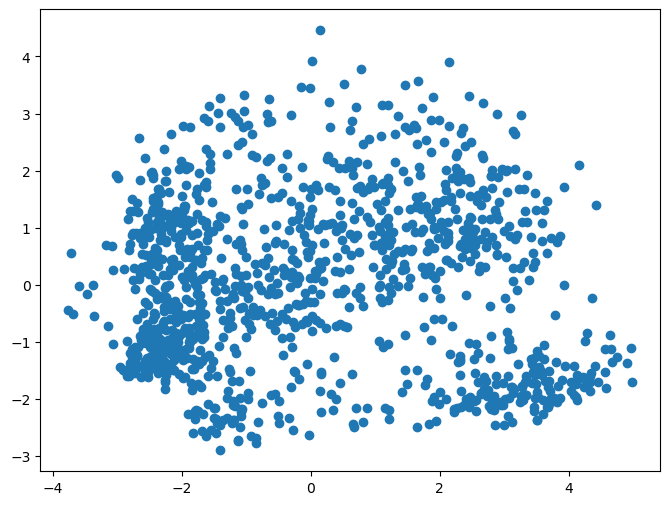

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)  # Fit PCA on the standardized data
X_pca = pca.transform(X_scaled)  # Transform the data into principal components

# Display the shapes of the scaled and PCA-transformed data
X_scaled.shape
X_pca.shape

# Display the PCA-transformed data
X_pca

# Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])

# Show statistical summary of the original data
df2.describe()


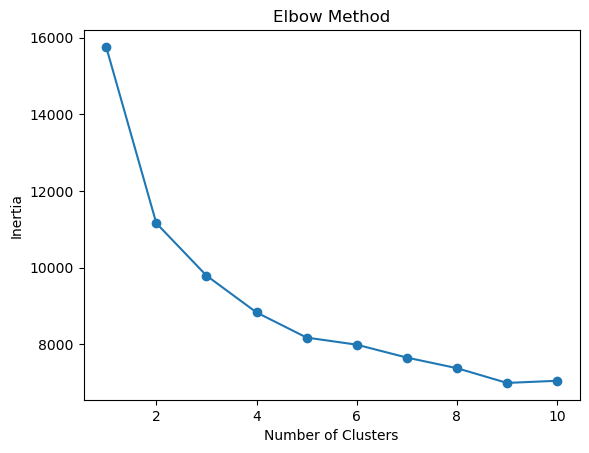

Cluster
1    397
3    325
2    300
0    190
Name: count, dtype: int64
Cluster centroids:
 [[ 3.05969544 -1.64248541]
 [-1.70307928 -1.09482533]
 [-1.61324112  1.11625499]
 [ 1.78105389  1.27400759]]


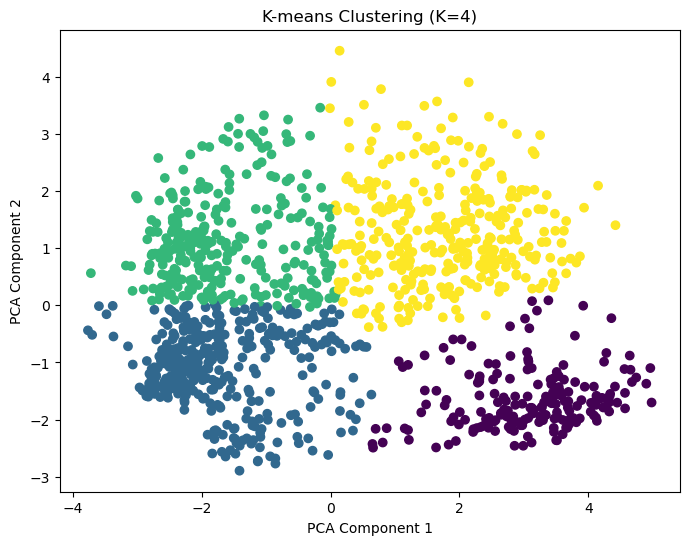

In [48]:
# Import required libraries
from sklearn.cluster import KMeans

# Assuming X_pca is the data reduced to principal components

# Determine the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph to identify the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters based on the elbow method graph
# Assume the optimal number of clusters is 4
k = 4

# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the DataFrame
df2['Cluster'] = clusters

# Print the number of data points in each cluster
print(df2['Cluster'].value_counts())

# Analyze the clusters by checking the centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (K=4)')
plt.show()


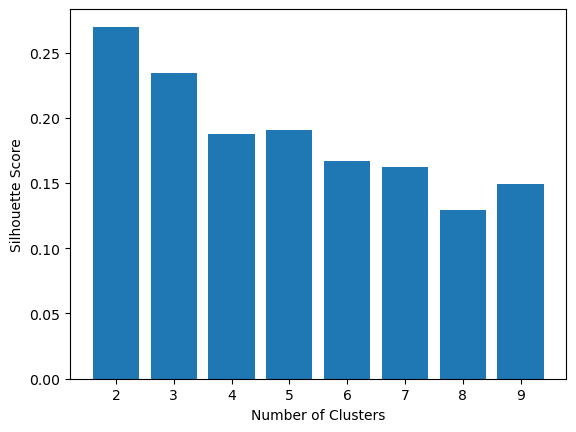

In [49]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 10):
    m1 = KMeans(n_clusters=i, random_state=42)
    clusters = m1.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

# Plot the silhouette scores for each number of clusters
plt.bar(range(2, 10), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


         Education  Marital_Status        Income   Kidhome  Teenhome  \
Cluster                                                                
0         2.652632        3.836842  71529.800000  0.015789  0.021053   
1         2.392947        3.725441  31508.702771  0.687657  0.138539   
2         2.700000        3.626667  40822.070000  0.836667  0.866667   
3         2.716923        3.661538  62458.427692  0.095385  0.990769   

           Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                                       
0        52.094737           1.073684         4.431579             5.242105   
1        50.425693           1.518892         1.972292             0.430730   
2        50.110000           2.890000         2.920000             0.683333   
3        50.107692           2.861538         6.147692             3.581538   

         NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
Cluster        

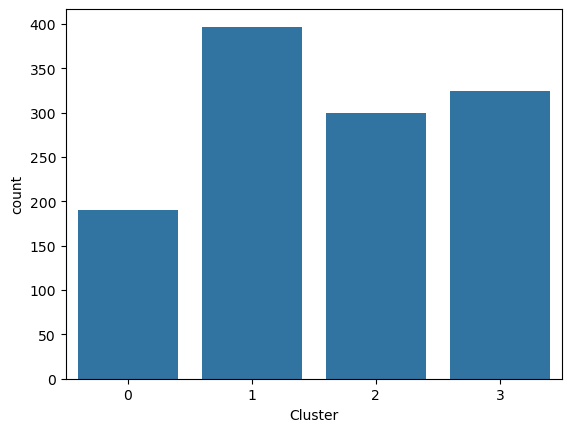

In [50]:
# Analyze the average characteristics of each cluster
K_cluster_means = df2.groupby('Cluster').mean()
print(K_cluster_means)

# Plot the distribution of data points across clusters
sns.countplot(x=df2['Cluster'])
plt.show()


Build the Model K Means Clustering

In [52]:
# Convert the PCA-transformed data to a DataFrame
X = pd.DataFrame(X_pca)

# Define the target variable 'Cluster' for clustering results
y = df2['Cluster']

# Display the PCA-transformed data
X


0         1
0    -2.028298  0.609986
1     2.584627 -1.195561
2    -2.057275 -1.003565
3     0.216055  1.056366
4     1.901780  0.986742
...        ...       ...
1207 -3.378934 -0.008799
1208  2.408617 -0.177596
1209 -1.125462 -2.719481
1210  1.909774  1.016560
1211  2.729360  0.752802

[1212 rows x 2 columns]

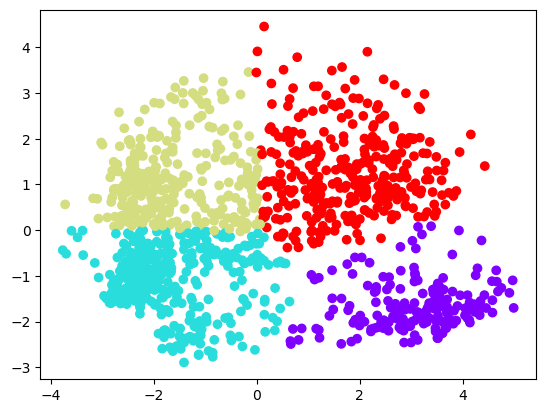

In [53]:
# Scatter plot of the first two columns of PCA-transformed data
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.show()


In [54]:
## Perform train-test split for PCA data and cluster labels as the target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Display the shapes of the training and testing sets
print(X_train.shape)
X_test.shape


(909, 2)


(303, 2)

In [55]:
## Logistic Regression with Cross-Validation
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model with cross-validation
Lr = LogisticRegressionCV()
Lr.fit(X_train, y_train)

# Predict cluster labels for training and testing sets
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)

# Calculate and print accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.9977997799779978
Test accuracy: 0.9966996699669967


In [56]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict cluster labels for both training and testing sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate and print the accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 1.0
Test accuracy: 0.9801980198019802


In [57]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict cluster labels for both training and testing sets
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)

# Calculate and print the accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 1.0
Test accuracy: 0.9867986798679867


In [58]:
#SVM Classifier
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict cluster labels for both training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate and print the accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.9955995599559956
Test accuracy: 0.9933993399339934


In [59]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict cluster labels for both training and testing sets
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)

# Calculate and print the accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.9834983498349835
Test accuracy: 0.9735973597359736


Conclusion : In this analysis, various classification algorithms were evaluated to determine their performance in predicting clusters obtained from K-means clustering. Among the algorithms tested, the Random Forest classifier exhibited the best accuracy in predicting the cluster labels. This indicates that Random Forest is effective at capturing the complex relationships within the PCA-transformed data and provides reliable predictions for cluster assignments. This model's superior performance suggests that it may be a suitable choice for clustering-related classification tasks in this context.

Performing Agglomerative Clustering

In [62]:
# Create a copy of the DataFrame df2
df4 = df2.copy()

# Remove the 'Cluster' column from df4
df4.drop('Cluster', axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
df4.head()


Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1  
5             0         0         0                 716         1

In [63]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with 4 clusters
agglomerative_cluster = AgglomerativeClustering(n_clusters=4)
cluster = agglomerative_cluster.fit_predict(X_scaled)

# Add the cluster labels from Agglomerative Clustering to the DataFrame df4
df4['Agglomerative Cluster'] = cluster

# Display the first 8 rows of the updated DataFrame
df4.head(8)


Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1           2               4  46344.0        1         1       38   
2           2               5  71613.0        0         0       26   
3           2               5  26646.0        1         0       26   
4           4               3  58293.0        1         0       94   
5           3               5  62513.0        0         1       16   
6           2               2  55635.0        0         1       34   
7           4               3  33454.0        1         0       32   
10          1               3   7500.0        0         0       59   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                   2                1                    1   
2                   1                8                    2   
3                   2                2                    0   
4                   5                5                    3   
5                   2                6                    4   
6                   4                7                    3   
7                   2                4                    0   
10                  1                2                    0   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                   2                  5             0             0   
2                  10                  4             0             0   
3                   4                  6             0             0   
4                   6                  5             0             0   
5                  10                  6             0             0   
6                   7                  6             0             0   
7                   4                  8             0             0   
10                  3                  8             0             0   

    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
1              0             0             0         0         0   
2              0             0             0         0         0   
3              0             0             0         0         0   
4              0             0             0         0         0   
5              0             0             0         0         0   
6              0             0             0         0         0   
7              0             0             0         0         0   
10             0             0             0         0         0   

    total_amount_spent  Children  Agglomerative Cluster  
1                   27         2                      1  
2                  776         0                      2  
3                   53         1                      0  
4                  422         1                      1  
5                  716         1                      3  
6                  590         1                      3  
7                  169         1                      0  
10                  61         0                      0

                       Education  Marital_Status        Income   Kidhome  \
Agglomerative Cluster                                                      
0                       2.463203        3.705628  32932.945887  0.623377   
1                       2.684411        3.688213  44285.079848  1.007605   
2                       2.727848        3.822785  73714.158228  0.012658   
3                       2.650456        3.647416  61204.841945  0.009119   

                       Teenhome    Recency  NumDealsPurchases  \
Agglomerative Cluster                                           
0                      0.201299  51.850649           1.636364   
1                      0.817490  51.307985           2.939163   
2                      0.000000  51.702532           1.044304   
3                      1.012158  47.468085           2.765957   

                       NumWebPurchases  NumCatalogPurchases  \
Agglomerative Cluster                                         
0                         

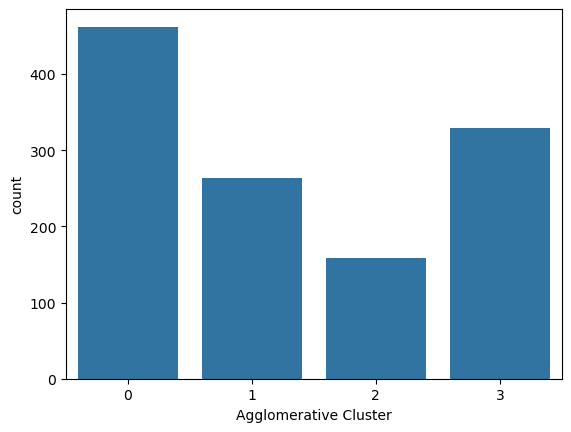

In [64]:
# Analyze the average characteristics of each Agglomerative cluster
Agglomerative_means = df4.groupby('Agglomerative Cluster').mean()
print(Agglomerative_means)

# Plot the distribution of data points across Agglomerative clusters
sns.countplot(x=df4['Agglomerative Cluster'])
plt.show()


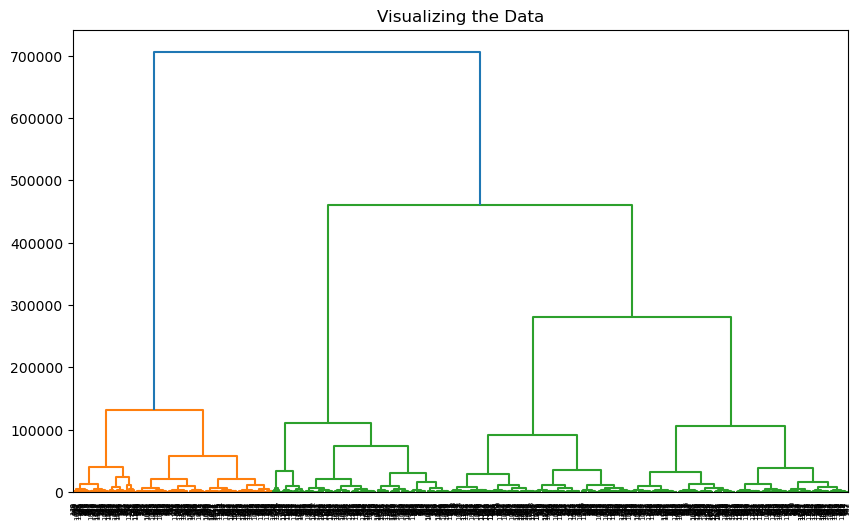

In [65]:
import scipy.cluster.hierarchy as shc

# Create a figure for the dendrogram plot
plt.figure(figsize=(10, 6))
plt.title('Visualizing the Data')

# Generate and display the dendrogram
Dendrogram = shc.dendrogram(shc.linkage(df4, method='ward'))
plt.show()


Building Model for Agglomerative Clustering

In [67]:
# Convert the PCA-transformed data into a DataFrame
X = pd.DataFrame(X_pca)

# Extract the cluster labels assigned by Agglomerative Clustering
y = df4['Agglomerative Cluster']

# Display the cluster labels
print(y)


1       1
2       2
3       0
4       1
5       3
       ..
2025    0
2027    3
2028    0
2030    3
2032    3
Name: Agglomerative Cluster, Length: 1212, dtype: int64


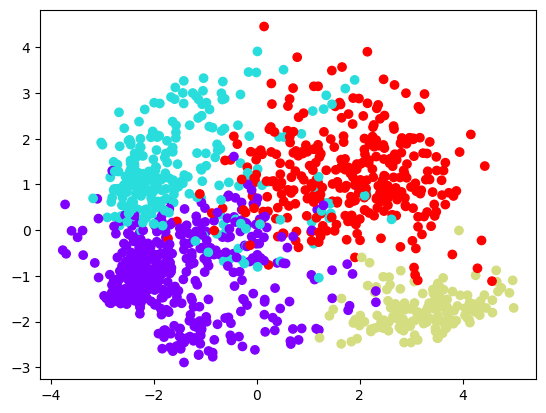

In [68]:
import matplotlib.pyplot as plt

# Create a scatter plot using the first two principal components
# Color points by their Agglomerative Clustering labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglomerative_cluster.labels_, cmap="rainbow")

# Display the plot
plt.show()


In [69]:
from sklearn.model_selection import train_test_split

# Split the PCA-transformed data and cluster labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Print the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)


(909, 2)
(303, 2)


In [70]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Initialize and fit the Logistic Regression model with cross-validation
Lr = LogisticRegressionCV()
Lr.fit(X_train, y_train)

# Predict training and testing data
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)

# Calculate and print accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict training and testing data
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate and print accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.8943894389438944
Test accuracy: 0.8778877887788779
Train accuracy: 1.0
Test accuracy: 0.8382838283828383


In [71]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest model
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

# Predict outcomes for both training and testing sets
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)

# Compute and print accuracy scores for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# SVM Classifier
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)

# Predict outcomes for both training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Compute and print accuracy scores for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 1.0
Test accuracy: 0.8778877887788779
Train accuracy: 0.9031903190319032
Test accuracy: 0.8877887788778878


In [72]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train the Gaussian Naive Bayes model
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)

# Predict outcomes for both training and testing sets
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)

# Compute and print accuracy scores for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.88998899889989
Test accuracy: 0.8613861386138614


The Decision Tree classifier performs well, providing high accuracy when applied to data clustered using Agglomerative Clustering.

#DBSCAN Clustering

db_Cluster
 0    1005
 1     166
-1      41
Name: count, dtype: int64


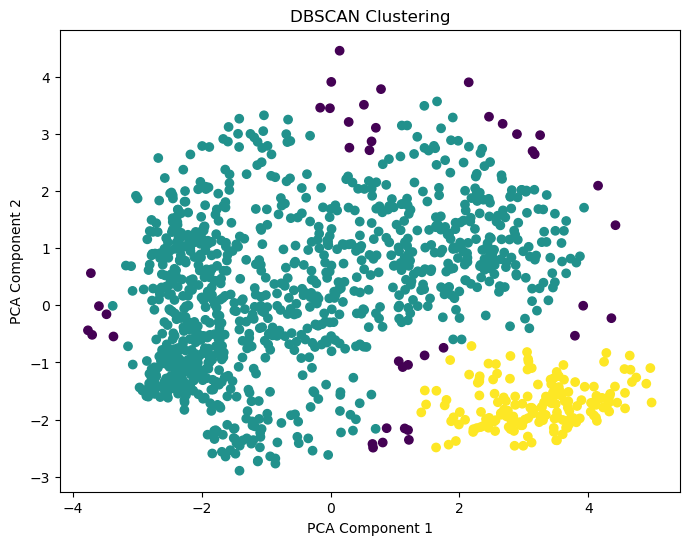

In [75]:
from sklearn.cluster import DBSCAN

# Create a copy of the DataFrame and remove the existing 'Cluster' column
df5 = df2.copy()
df5.drop('Cluster', axis=1, inplace=True)

# Initialize DBSCAN with specified hyperparameters (you may need to adjust these)
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Perform clustering using DBSCAN
clusters = dbscan.fit_predict(X_pca)

# Add the cluster labels to the DataFrame
df5['db_Cluster'] = clusters

# Print the number of data points in each cluster
print(df5['db_Cluster'].value_counts())

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering')
plt.show()


In [76]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_pca)
kmeans_silhouette = silhouette_score(X_pca, kmeans_clusters)
print("K-means Silhouette Score:", kmeans_silhouette)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_pca)

# Note: DBSCAN can produce -1 labels for outliers, which causes silhouette_score to fail
try:
    dbscan_silhouette = silhouette_score(X_pca, dbscan_clusters)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
except ValueError as e:
    print("DBSCAN Silhouette Score cannot be computed:", e)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clusters = agg_cluster.fit_predict(X_pca)
agg_silhouette = silhouette_score(X_pca, agg_clusters)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)


K-means Silhouette Score: 0.43616206806150093
DBSCAN Silhouette Score: -0.26797153970433885
Agglomerative Clustering Silhouette Score: 0.39073842910319057


Building Model for DBSCAN

In [78]:
# Create a DataFrame from PCA-transformed data and assign the DBSCAN cluster labels
X = pd.DataFrame(X_pca)
y = df5['db_Cluster']
y


1       0
2       1
3       0
4       0
5       0
       ..
2025    0
2027    0
2028    0
2030    0
2032    0
Name: db_Cluster, Length: 1212, dtype: int64

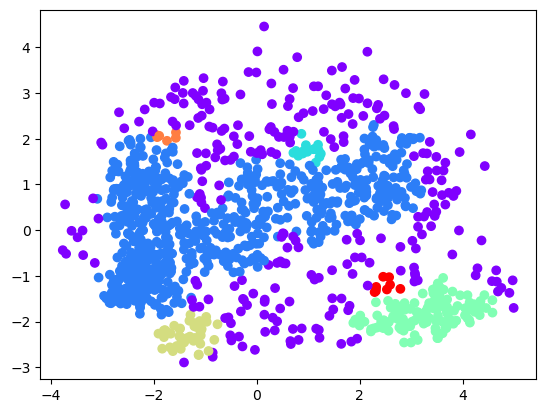

In [79]:
# Scatter plot of the first two PCA components with DBSCAN cluster labels
import matplotlib.pyplot as plt

# Create a scatter plot using the first two columns of the PCA-transformed data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan.labels_, cmap="rainbow")
plt.show()


In [80]:
## Perform train-test split with PCA-transformed data and DBSCAN clusters as the target variable
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Print the shapes of the training and testing datasets
print(X_train.shape)
print(X_test.shape)


(909, 2)
(303, 2)


In [81]:
#Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
Lr = LogisticRegressionCV()
Lr.fit(X_train, y_train)

# Predict training and testing data
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)

# Calculate and print accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict training and testing data
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate and print accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.9647964796479648
Test accuracy: 0.9570957095709571
Train accuracy: 1.0
Test accuracy: 0.9735973597359736


In [82]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

# Predict labels for training and testing sets
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)

# Calculate and print accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

## Support Vector Machine (SVM) Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

# Predict labels for training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate and print accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

## Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)

# Predict labels for training and testing sets
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)

# Calculate and print accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 1.0
Test accuracy: 0.9735973597359736
Train accuracy: 0.9757975797579758
Test accuracy: 0.9636963696369637
Train accuracy: 0.9592959295929593
Test accuracy: 0.9537953795379538


Random Forest Classifier achieved the best accuracy in predicting clusters from DBScan clustering results.

This suggests that Random Forest is effective for classifying data into clusters identified by DBScan, given its performance compared to other classifiers in our experiments.

Finalising The Model

In [85]:
df_final=df2.copy()
df_final

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1             2               4  46344.0        1         1       38   
2             2               5  71613.0        0         0       26   
3             2               5  26646.0        1         0       26   
4             4               3  58293.0        1         0       94   
5             3               5  62513.0        0         1       16   
...         ...             ...      ...      ...       ...      ...   
2025          2               3  24434.0        2         0        9   
2027          3               4  44802.0        0         0       71   
2028          2               4  26816.0        0         0       50   
2030          2               3  61223.0        0         1       46   
2032          3               5  69245.0        0         1        8   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
5                     2                6                    4   
...                 ...              ...                  ...   
2025                  2                2                    1   
2027                  2                9                    4   
2028                  1                0                    0   
2030                  2                9                    3   
2032                  2                6                    5   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
5                    10                  6             0             0   
...                 ...                ...           ...           ...   
2025                  2                  7             0             0   
2027                 12                  8             0             0   
2028                  3                  4             0             0   
2030                  4                  5             0             0   
2032                 10                  3             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
5                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2025             0             0             0         0         0   
2027             0             0             0         0         0   
2028             0             0             0         0         0   
2030             0             0             0         0         0   
2032             0             0             0         0         0   

      total_amount_spent  Children  Cluster  
1                     27         2        2  
2                    776         0        0  
3                     53         1        1  
4                    422         1        3  
5                    716         1        3  
...                  ...       ...      ...  
2025                  50         2        1  
2027                1049         0        3  
2028                  22         0        1  
2030                1341         1        3  
2032                 843         1        3  

[1212 rows x 21 columns]

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc=StandardScaler()
final_df=sc.fit_transform(df_final)
#pca=PCA(n_components=2)
#final_df_pca=pca.fit_transform(final_df)
print(final_df)


[[-0.68331387  0.27811387 -0.10847865 ... -0.88048848  1.55680275
   0.35824759]
 [-0.68331387  1.20925753  1.23314856 ...  0.61200956 -1.52376041
  -1.56297398]
 [-0.68331387  1.20925753 -1.1543203  ... -0.82867947  0.01652117
  -0.6023632 ]
 ...
 [-0.68331387  0.27811387 -1.14529435 ... -0.89045175 -1.52376041
  -0.6023632 ]
 [-0.68331387 -0.6530298   0.68150399 ...  1.73785922  0.01652117
   1.31885837]
 [ 0.46215834  1.20925753  1.10742244 ...  0.74551739  0.01652117
   1.31885837]]


In [87]:
from sklearn.cluster import KMeans
# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(final_df)

# Adding the cluster labels to the DataFrame
df_final['Cluster'] = clusters

# Printing the count of data points in each cluster
print(df_final['Cluster'].value_counts())


Cluster
1    383
2    334
3    305
0    190
Name: count, dtype: int64


In [88]:
X=pd.DataFrame(final_df)
y=df_final['Cluster']
X

0         1         2         3         4         5         6   \
0    -0.683314  0.278114 -0.108479  1.032399  0.892141 -0.439656 -0.111267   
1    -0.683314  1.209258  1.233149 -0.880854 -1.001510 -0.860918 -0.860468   
2    -0.683314  1.209258 -1.154320  1.032399 -1.001510 -0.860918 -0.111267   
3     1.607631 -0.653030  0.525939  1.032399 -1.001510  1.526238  2.136334   
4     0.462158  1.209258  0.749995 -0.880854  0.892141 -1.211971 -0.111267   
...        ...       ...       ...       ...       ...       ...       ...   
1207 -0.683314 -0.653030 -1.271764  2.945652 -1.001510 -1.457708 -0.111267   
1208  0.462158  0.278114 -0.190349 -0.880854 -1.001510  0.718818 -0.111267   
1209 -0.683314  0.278114 -1.145294 -0.880854 -1.001510 -0.018393 -0.860468   
1210 -0.683314 -0.653030  0.681504 -0.880854  0.892141 -0.158814 -0.111267   
1211  0.462158  1.209258  1.107422 -0.880854  0.892141 -1.492813 -0.111267   

            7         8         9         10   11   12   13   14   15   16  \
0    -1.090774 -0.453468 -1.126601 -0.146730  0.0  0.0  0.0  0.0  0.0  0.0   
1     1.724598 -0.038360  1.386287 -0.601555  0.0  0.0  0.0  0.0  0.0  0.0   
2    -0.688578 -0.868575 -0.498379  0.308095  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.518010  0.376748  0.129843 -0.146730  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.920206  0.791856  1.386287  0.308095  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
1207 -0.688578 -0.453468 -1.126601  0.762921  0.0  0.0  0.0  0.0  0.0  0.0   
1208  2.126794  0.791856  2.014509  1.217746  0.0  0.0  0.0  0.0  0.0  0.0   
1209 -1.492970 -0.868575 -0.812490 -0.601555  0.0  0.0  0.0  0.0  0.0  0.0   
1210  2.126794  0.376748 -0.498379 -0.146730  0.0  0.0  0.0  0.0  0.0  0.0   
1211  0.920206  1.206964  1.386287 -1.056381  0.0  0.0  0.0  0.0  0.0  0.0   

       17        18        19        20  
0     0.0 -0.880488  1.556803  0.358248  
1     0.0  0.612010 -1.523760 -1.562974  
2     0.0 -0.828679  0.016521 -0.602363  
3     0.0 -0.093390  0.016521  1.318858  
4     0.0  0.492450  0.016521  1.318858  
...   ...       ...       ...       ...  
1207  0.0 -0.834657  1.556803 -0.602363  
1208  0.0  1.156004 -1.523760  1.318858  
1209  0.0 -0.890452 -1.523760 -0.602363  
1210  0.0  1.737859  0.016521  1.318858  
1211  0.0  0.745517  0.016521  1.318858  

[1212 rows x 21 columns]

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
final_model=RandomForestClassifier()
final_model.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.9867986798679867

In [90]:
#Creatinga Pickle file using serialization
import pickle
pickle_out = open("final_model.pkl","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [91]:
df_final.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_amount_spent',
       'Children', 'Cluster'],
      dtype='object')

In [92]:
df_final.sample(1)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
955          2               5  22434.0        1         0       25   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
955                  2                2                    0   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
955                  3                  8             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
955             0             0             0         0         0   

     total_amount_spent  Children  Cluster  
955                  58         1        1

In [176]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df_final is already loaded. If not, we need to load it first.
# For this example, I'll create a sample dataframe
df_final = pd.DataFrame(np.random.rand(5, 3), columns=['A', 'B', 'C'])

sc = StandardScaler()
final_df = sc.fit_transform(df_final)
print(final_df)

# Save the scaler
import pickle
pickle_out = open('Projectscaler.pkl', 'wb')
pickle.dump(sc, pickle_out)
pickle_out.close()
print('Projectscaler.pkl has been created.')

[[-1.82977294  0.19931552  0.58926422]
 [ 1.11795098 -1.80239529  0.84171773]
 [ 0.61767667 -0.04813201 -1.89461416]
 [-0.04281741  1.24158527  0.58341155]
 [ 0.1369627   0.40962651 -0.11977933]]
Projectscaler.pkl has been created.


In [180]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

# Create a sample dataframe (as we did before)
df_final = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Scale the data
sc = StandardScaler()
final_df = sc.fit_transform(df_final)

# Create and fit PCA
pca = PCA(n_components=2)  # Reducing to 2 components
final_df_pca = pca.fit_transform(final_df)

# Save the PCA object
pickle_out = open('projectpca.pkl', 'wb')
pickle.dump(pca, pickle_out)
pickle_out.close()

print('projectpca.pkl has been created.')

# Display some information about the PCA
print("\
PCA Information:")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Singular Values: {pca.singular_values_}")

# Show a sample of the PCA-transformed data
print("\
Sample of PCA-transformed data:")
print(final_df_pca[:5])

projectpca.pkl has been created.
PCA Information:
Explained Variance Ratio: [0.2551609  0.21970202]
Singular Values: [11.29515167 10.48098328]
Sample of PCA-transformed data:
[[-0.08560258  1.89864352]
 [-0.86958442  0.60092693]
 [-0.56298468 -0.17601324]
 [-1.06702027  1.10802077]
 [-0.31004601  0.54184098]]
